In [87]:
import pandas_gbq
from datastory import DataStory
import plotly.express as px

In [88]:
df = pandas_gbq.read_gbq("SELECT * FROM `nais-analyse-prod-2dcc.deploys.from_devrapid`")

Downloading: 100%|██████████| 301160/301160 [00:48<00:00, 6168.05rows/s]
/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/table.py:2009: FutureWarning:

Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead



In [89]:
#Filter out canaries and auto-deployed system apps
df = df[df['application'] != 'nais-deploy-canary']
df = df[df['application'] != 'testapp-storage']
df = df[df['application'] != 'kafkarator-canary']

In [90]:
df_prod = df[df['environment']=='production'].copy()

df_prod['weeknr'] = df_prod['deployTime'].dt.isocalendar().week.astype(str)
df_prod['weeknr'] = df_prod['weeknr'].apply(lambda x: x.zfill(2))
df_prod['year'] = df_prod['deployTime'].dt.isocalendar().year.astype(str)
df_prod['week'] = df_prod['year'] + '-' + df_prod['weeknr']

In [91]:
systems = df_prod['deploymentSystem'].unique().tolist()
start = df_prod['deployTime'].min()

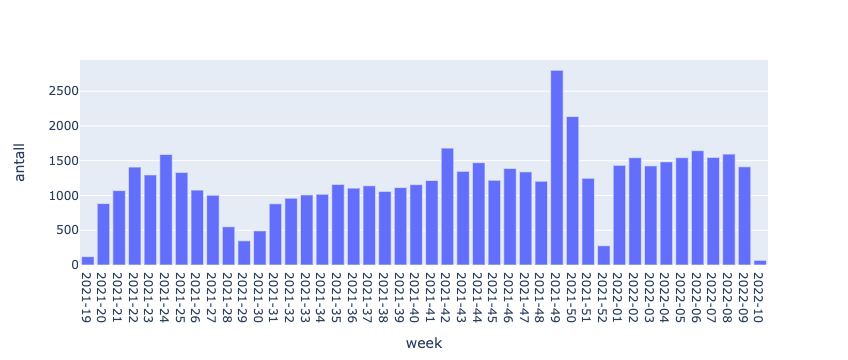

In [92]:
df_week_prod = df_prod.groupby('week').size().reset_index(name='antall')
fig_week_prod = px.bar(df_week_prod, x='week', y='antall')
fig_week_prod.update_xaxes(type='category')
fig_week_prod.show()

In [93]:
' og '.join(systems)

'naiserator og aura'

In [94]:
description = f'''Deploy-dataproduct inneholder deploys til alle miljøer fra deployment-systemene {' og '.join(systems)} i perioden fra {start.strftime("%Y-%m-%d kl %H:%M:%S")} til nå. Dataproduktet oppdateres i sanntid.'''

In [95]:
ds = DataStory("Dokumentasjon av deploy-dataproduct")

ds.header("Beskrivelse")
ds.markdown(description)
ds.header("Eksempler")
ds.header("Deploys til produksjon per uke", level=2)
ds.markdown("I denne grafen har vi filtrert på `environment=='production'` og talt antall deploys per uke.")
ds.plotly(fig_week_prod.to_json())

In [97]:
#ds.publish(url="https://nada.intern.nav.no/api")
ds.update(url="https://nada.intern.nav.no/api", token='6820858c-866f-4f31-9d70-e9a938c7e434')

'https://data.intern.nav.no/story/eb1743d3-3b7e-4b89-9ffc-928d1849044a'